## Train a simple Deep Neural Network on the MNIST Dataset

In [1]:
from __future__ import print_function

### Import the required module and packages

In [2]:
import keras
from keras.datasets import mnist
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
# Batch size to train the model
batch_size = 128 

#Number of classes available in the dataset
num_classes = 10

#Number of epochs for model training
epochs = 20

### Split the datasets for Training and Testing

In [4]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

### Preprocess the Dataset

In [5]:
#Reshape the mnist dataset from (60,000, 28, 28) to (60,000, 28*28)
X_train = X_train.reshape((60000, 28*28))
X_test = X_test.reshape((10000, 28*28))

#Change the datatype to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalize the dataset
X_train /= 255
X_test /= 255

#print out number of train and test samples
print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')

60000 train samples
10000 test samples


### Convert class labels to binary class matrices

In [6]:
from keras.utils import to_categorical

In [7]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

### Build the model

In [8]:
model = Sequential([
    Dense(512, activation = 'relu', input_shape = (28*28,)),
    Dropout(0.2),
    Dense(512, activation = 'relu'),
    Dropout(0.2),
    Dense(num_classes, activation = 'softmax')
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [9]:
model.compile(optimizer = RMSprop() , 
              loss = 'categorical_crossentropy', 
              metrics=['accuracy'])

### Early Stopping

In [10]:
#it will monitor validation loss. So, if validation loss does not decrease for 5 epochs it will stop the training

es_cb = EarlyStopping(monitor = 'val_loss', patience = 5)

### Fit the model

In [11]:
history = model.fit(X_train, y_train, 
                    epochs= epochs, 
                    batch_size = batch_size, 
                    verbose = 1, 
                    validation_data = (X_test, y_test), 
                    callbacks = [es_cb])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.2548 - acc: 0.9218 - val_loss: 0.1142 - val_acc: 0.9661
Epoch 2/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.1046 - acc: 0.9681 - val_loss: 0.0847 - val_acc: 0.9735
Epoch 3/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.0762 - acc: 0.9773 - val_loss: 0.0731 - val_acc: 0.9771
Epoch 4/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.0600 - acc: 0.9822 - val_loss: 0.0723 - val_acc: 0.9797.0600 -  - ETA: 6s - l
Epoch 5/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0515 - acc: 0.9852 - val_loss: 0.0761 - val_acc: 0.9801
Epoch 6/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.0439 - acc: 0.9872 - val_loss: 0.0828 - val_acc: 0.9807
Epoch 7/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0376 - acc: 0.98

### Plot the training and validation loss

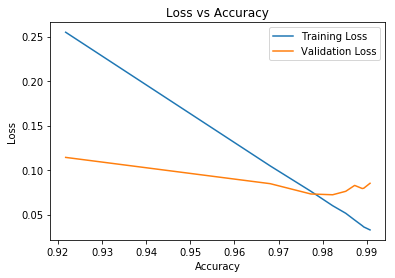

In [16]:
plt.plot(history.history['acc'], history.history['loss'])
plt.plot(history.history['acc'], history.history['val_loss'])
plt.xlabel('Accuracy')
plt.ylabel('Loss')
plt.title('Loss vs Accuracy')
plt.legend(['Training Loss','Validation Loss'])
plt.show()

### Evaluate the model

In [17]:
score = model.evaluate(X_test, y_test, verbose=0)

In [18]:
print('Test loss:',score[0])
print('Test Accuracy:',score[1])

Test loss: 0.08514907308049079
Test Accuracy: 0.9831
